# Memory Types in Agents and Humans

## **Procedural Memory**
- **Definition:** Long-term memory for how to perform tasks; akin to a brain’s core instruction set.
- **In Humans:** Remembering how to ride a bike.
- **In Agents:** 
  - Defined in the CoALA paper as a combination of **LLM weights** and **agent code** that determine how the agent operates.
  - **Current Practice:**
    - Few, if any, agentic systems update their LLM weights or rewrite their code automatically.
    - Some agents update their **system prompt** dynamically, though this is rare.

---

## **Semantic Memory**
- **Definition:** Long-term store of knowledge.
- **In Humans:** Facts learned in school, meanings of concepts, and their relationships.
- **In Agents:**
  - Defined in the CoALA paper as a **repository of facts about the world**.
  - **Usage:**
    - Personalizes applications by extracting information from interactions.
    - Application-specific storage, retrieved in future conversations to influence responses.

---

## **Episodic Memory**
- **Definition:** Recalling specific past events.
- **In Humans:** Remembering particular events or episodes experienced in the past.
- **In Agents:**
  - Defined in the CoALA paper as **storing sequences of past actions**.
  - **Usage:**
    - Implemented as **few-shot example prompting** or **dynamic few-shot prompting** with collected sequences.
    - Useful for tasks with a "correct" way of performing actions.
    - Differs from semantic memory, which is used when there’s no specific "correct" way to act or when new tasks arise frequently.



# Updating Agent Memory

## **1. How to Update Memory**
Developers consider two main ways to update agent memory:

### **In the Hot Path**
- **Definition:** The agent explicitly updates memory before responding, usually through tool-calling.
- **Example:** ChatGPT uses this approach.
- **Pros:**
  - Immediate memory updates.
- **Cons:**
  - Adds latency before delivering responses.
  - Combines memory logic with agent logic.

### **In the Background**
- **Definition:** A separate process updates memory during or after the conversation.
- **Pros:**
  - No added latency.
  - Keeps memory logic separate from agent logic.
- **Cons:**
  - Memory updates are not immediate.
  - Requires extra logic to determine when to trigger background updates.

### **User Feedback for Memory Updates**
- **Relevance:** Particularly useful for episodic memory.
- **Example:** If a user marks an interaction as positive, save the feedback for future use.

---

## **2. Why Memory Matters for Agents**
Memory significantly enhances the usefulness of agentic systems by enabling:
- Personalization
- Improved task performance through episodic and semantic recall

### **LangChain’s Contributions to Agent Memory**
LangChain simplifies leveraging memory in applications by providing:
1. **Low-level abstractions** for a memory store in **LangGraph**.
2. **Templates** for running memory updates both:
   - In the hot path
   - In the background
3. **Dynamic Few-Shot Example Selection** in **LangSmith** for rapid iteration.

---

## **3. Visual Comparison**

The image below demonstrates the two approaches:
- **In the Hot Path** (left side): Immediate memory updates before responding.
- **In the Background** (right side): Delayed memory updates via background processes.

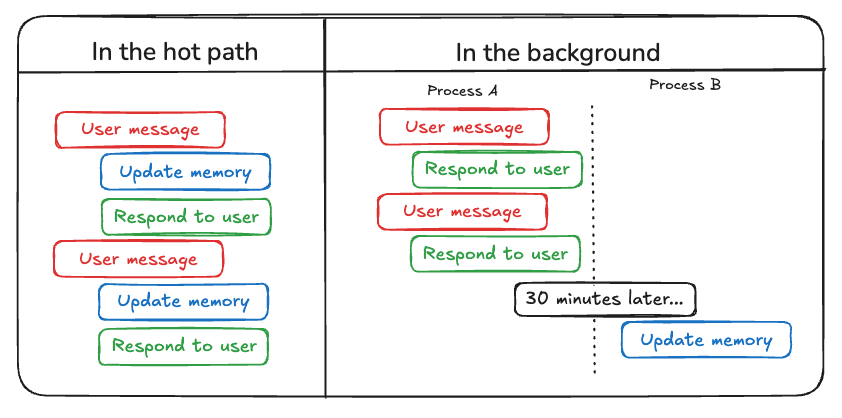

In [37]:
from dotenv import load_dotenv
import os

# Reload environment variables
load_dotenv(override=True)

# Print the value of a variable from the .env file
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

In [54]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(temperature=0.7, model="gpt-4o",api_key=OPENAI_API_KEY)

In [55]:
from langchain_core.messages import HumanMessage, SystemMessage
from datetime import datetime

# Define System Prompt
system_prompt = SystemMessage("You are a helpful AI Assistant. Answer the User's queries succinctly in one sentence.")

# Start Storage for Historical Message History with Timestamps
messages = [{"role": "system", "content": system_prompt.content, "timestamp": datetime.now()}]

while True:

    # Get User's Message
    user_message = HumanMessage(input("\nUser: "))
    timestamp = datetime.now()

    if user_message.content.lower() == "exit":
        break

    else:
        # Extend Messages List with User Message and Timestamp
        messages.append({"role": "user", "content": user_message.content, "timestamp": timestamp})

    # Pass Entire Message Sequence to LLM to Generate Response
    response = llm.invoke([msg["content"] for msg in messages])

    # Print AI Response
    print("\nAI Message: ", response.content)

    # Add AI's Response with Timestamp to Message List
    messages.append({"role": "assistant", "content": response.content, "timestamp": datetime.now()})



User:  Hi



AI Message:  Hello! How can I assist you today?



User:  what is my name?



AI Message:  I'm sorry, I don't have access to your personal information, so I don't know your name.



User:  exit


In [44]:
pip install openai


Note: you may need to restart the kernel to use updated packages.
